In [155]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sympy as sym

In [156]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
Náš expertní odhad pro náhodnou veličinou s Poissonovým rozdělením je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

<!--
Máme náhodnou veličinu s Poissonovým rozdělením a expertní odhad, že každých 5 ms by mělo nastat 10 připojení. Expertní odhad můžeme reformulovat na znění, že průměrná doba mezi dvěma připojeními je 0.5 ms. Pak tento odhad odpovídá exponenciálnímu rozdělení s parametrem $\lambda = 2$. Dle Wikipedia je pro Poissonovo rozdělení vhodným konjugovaným apriorním rozdělením Gamma rozdělení. Hustota pravděpodobnosti (pdf) Gamma rozdělení je dána vztahem:
$$
pdf(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
$$
a vztah pto hustotu pravděpodobnosti expertního odhadu je následující:
$$
pdf(x) = \lambda e^{-\lambda x}.
$$
Pro parametry $\alpha$ a $\beta$ bude zřejmě platit následující, abychom mohli použít Gamma rozdělení jako konjugované apriorní rozdělení:
* $x^{\alpha - 1} = 1$, tzn., $\alpha - 1 = 0$ a tím pádem $\alpha = 1$
* $e^{-\beta x} = e^{-\lambda x}$, čili $\beta = \lambda$
* zbylé hodnoty jsou pouze multiplikativní konstanty, které nemají na polohu maxima vliv.

Správnost volby konjugovaného apriorního rozdělení pak ověříme graficky.
>

### 1) Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme jako hustotu Gamma rozdělení s parametry viz výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=10 + \sum^{n}_{i=1} x_i$ a $\beta=5+n$

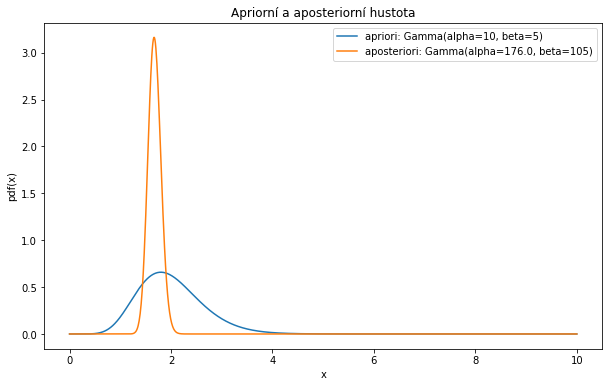

In [157]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 1000)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_apriori, label=f"apriori: Gamma(alpha={alpha_apriori}, beta={beta_apriori})")
plt.plot(x, y_aposteriori, label=f"aposteriori: Gamma(alpha={alpha_aposteriori}, beta={beta_aposteriori})")
plt.legend()
plt.show()

### 2) Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\beta/(\beta+1)$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=(\beta+n)/(\beta+n+1)$

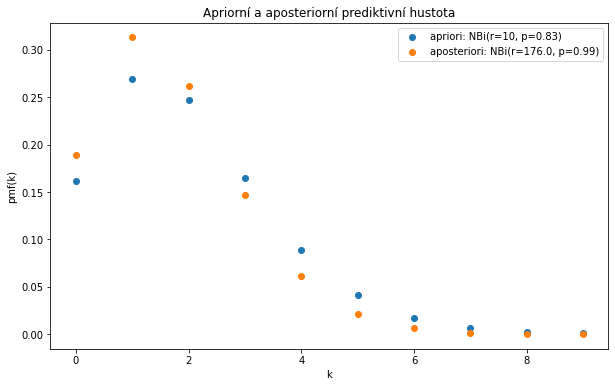

In [158]:
plt.figure(figsize=(10, 6))
k = np.linspace(0, 9, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("pmf(k)")
plt.scatter(k, y_apriori, label=f"apriori: NBi(r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)})")
plt.scatter(k, y_aposteriori, label=f"aposteriori: NBi(r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)})")
plt.legend()
plt.show()

### 3) Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2,5 a  97,5 percentily Gamma rozdělení s odpovídajícími parametry.
<!--
Interval spolehlivosti odhadu parametru $\lambda$ je roven $(\hat{\lambda}g_{1-\alpha/2}, \hat{\lambda}g_{\alpha/2})$, kde:
* $\hat{\lambda}$ je bodový odhad parametru $\lambda$,
* $1 - \alpha$ je hladina významnosti,
* $g_{k}$ je $k$-tý percentil Gamma rozdělení.

Apriorního i aposteriorní rozdělení se řídí Gamma rozdělením, tzn., bodové odhady jejich parametrů $\lambda$ jsou dány následovně:
$$
\hat{\lambda} = \frac{\alpha + \sum^{n}_{i=1} x_i}{\beta + n}.
$$
!>

In [159]:
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: {lambda_confidence_interval_apriori}")
print(f"Aposteriorní 95% interval spolehlivosti: {lambda_confidence_interval_aposteriori}")

Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.

### 4) Výběr dvou aposteriorních bodových odhadů parametru $\lambda$
Prvně vybereme parametr $\lambda$ jako střední hodnotou aposteriorního Gamma rozdělení, tj. jeho Bayesovský bodový odhad:
$$
\lambda_1 \overset{odhad}{=} \frac{10 + 166}{5 + 100}=1,6762
$$
Jako druhý bodový odhad parametru $\lambda$ zvolíme modus aposteriorního Gamma rozdělení:
$$\lambda_2 \overset{odhad}{=} \frac{10+166-1}{5+100} = 1,6667$$ 

Pokud bychom následně prováděli další sady pozorování, v průměru bychom se měli blížit k odhadu parametru $\lambda = 1,6762$ ($1,6762$ připojení za 1 ms), nejčastěji však bude odhad $\lambda = 1,6667$ ($1,6667$ připojení za 1 ms) pro danou sadu. 

### 5) Výběr apriorního a aposteriorního bodového odhadu počtu pozorování


In [160]:
observations_apriori = alpha_apriori * (1 - beta_apriori / (beta_apriori + 1)) / (beta_apriori / (beta_apriori + 1))
observations_aposteriori = alpha_aposteriori * (1 - beta_aposteriori / (beta_aposteriori + 1)) / (beta_aposteriori / (beta_aposteriori + 1))

print(f"Apriorní očekávaný počet pozorování: {observations_apriori}")
print(f"Aposteriorní očekávaný počet pozorování: {observations_aposteriori}")

Apriorní očekávaný počet pozorování: 1.9999999999999996
Aposteriorní očekávaný počet pozorování: 1.6761904761904758


Jako oba výběry zvolíme střední hodnoty negativních binomických rozdělení s odpovídajícími parametry, tj.:
$$počet\_pozorování_{apriori}=\frac{10 \cdot (1-0.83)}{0.83}=2,0$$
$$počet\_pozorování_{aposteriori}=\frac{176 \cdot (1-0.99)}{0.99}=1,6762$$

Z vybraných odhadů lze vidět, že pozorováním se poměrně významně posunul průměrný odhad počtu připojení za 1 ms z původního expertního odhadu.

## b) Aproximace diskrétním rozdělením
Postup bude následující:
1. Numericky zintegrujeme a normalizujeme funkci danou maximálními hodnotami *prior* měření pro každou skupinu, čímž dostaneme apriorní hustotu pravděpodobnosti rozdělení parametru $b$ $h(b)$, respektive pravděpodobnostní funkci rozdělení parametru $b$, protože numerickou integrací hustotu diskretizujeme. Diskretizaci provedeme na intervalu zdola ohraničeném minimem z maxim hodnot *prior* měření a shora maximem hodnot *prior* měření tak, že jej rovnoměrně rozdělíme na 50 podintervalů, které budeme uvažovat jako množinu diskrétních bodů (středy podintervalů) $B$. Jinde bude hodnota apriorní pravděpodobnostní funkce rozdělení parametru $b$ rovna 0.
2. Na vhodném diskretizovaném intervalu spočteme funkci věrohodnosti parametru $b$ $l(b)$ na základě *pozorování* a normalizujeme její hodnoty aplikováním funkce *Softmax*. Interval zdola ohraničíme maximem z hodnot *pozorování* a shora maximem z hodnot *prior* měření a funkci věrohodnosti tak budeme počítat pouze pro body z $B$, které náleží do tohoto intervalu, jinak její hodnota bude 0.
3. Aposteriorní pravděpodobnostní funkce $P(b)$ je pak dána vztahem $P(b)=(l(b)h(b))/k$, kde $k$ je nějaká konstanta, kterou lze vypočítat jako $k=\sum_{b_i \in B}l(b_i)h(b_i)$ tím, že $l(b)$ i $h(b)$ jsou diskrétní funkce. Zřejmě hodnota aposteriorní pravděpodobnostní funkce různá od 0 pouze na intervalu definovaném v bodě 2.
4. Apriorní pravděpodobnostní funkci, aposteriorní pravděpodobnostní funkci a funkci věrohodnosti interpolujeme zpět na spojité hustoty pomocí historgramů.

In [161]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
prior_values = df_prior.values.flatten()

prior_hist_values, prior_hist_range = np.histogram(prior_values, bins=50)
prior_pmf = prior_hist_values / prior_hist_values.sum()
B_range = prior_hist_range[1:] + (prior_hist_range[1:] - prior_hist_range[:-1]) / 2

In [162]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations_max = observations.max()
observations_argmax = np.argmax(B_range >= observations_max)
B_likelihood_range = B_range[observations_argmax:]

mean = 3
a = 1
scale = 1

log_likelihood_values = []
for b in B_likelihood_range:
    lower_bound = (a - mean)
    upper_bound = (b - mean)
    logpdf = st.truncnorm.logpdf(observations, lower_bound, upper_bound, loc=mean, scale=scale)
    log_likelihood_values.append(logpdf.sum())

likelihood = np.zeros(B_range.shape[0])
likelihood[observations_argmax:] = sp.softmax(log_likelihood_values)

In [163]:
posterior = prior_pmf * likelihood
posterior_pmf = posterior / posterior.sum()

### 1) Graf apriorní, aposteriorní hustotou a funkce věrohodnosti

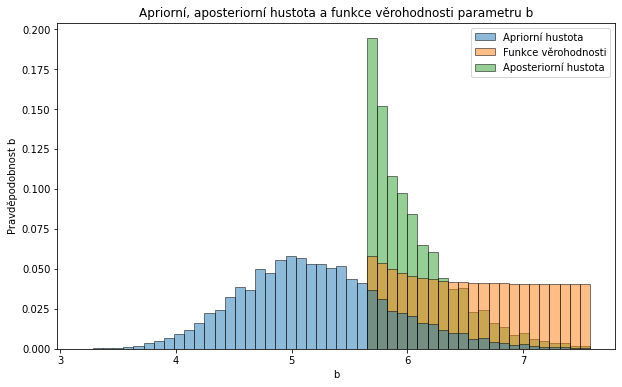

In [164]:
plt.figure(figsize=(10, 6))
plt.title("Apriorní, aposteriorní hustota a funkce věrohodnosti parametru b")
plt.xlabel("b")
plt.ylabel("Pravděpodobnost b")
plt.hist(B_range, bins=prior_hist_range, weights=prior_pmf, label="Apriorní hustota", alpha=0.5, edgecolor="black", zorder=3)
plt.hist(B_range, bins=prior_hist_range, weights=likelihood, label="Funkce věrohodnosti", alpha=0.5, edgecolor="black", zorder=2)
plt.hist(B_range, bins=prior_hist_range, weights=posterior_pmf, label="Aposteriorní hustota", alpha=0.5, edgecolor="black", zorder=1)
plt.legend()
plt.show()

### 2) 95% interval spolehlivosti parametru $b$
Parametr $b$ představuje horní ohraničení v odseknutém normálním rozdělení pro to má smysl počítat je  Jako interval spolehlivosti budeme uvažovat jednostranný interval zdola ohraničený maximální hodnotou z *pozorování* a shora pak nejmenší hodnotou $b \in B$, pro kterou platí, že $P(X \le b) \ge 0.95$.  

In [165]:
prob_sum = 0
i = observations_argmax
while prob_sum < 0.95:
    prob_sum += posterior_pmf[i]
    i += 1

print(f"Aposteriorní 95% interval spolehlivosti parametru b: <{observations_max}, {prior_hist_range[i]})")

Aposteriorní 95% interval spolehlivosti parametru b: <5.68281970810648, 6.789710861653535)


### 3) Bodové odhady parametru $b$
Jako bodové odhady si vybereme střední hodnotu a modus. Pro výpočet střední hodnoty opět využijeme diskrétních hodnot. Modus bychom měli spočítat jako $argmax$ z aposteriorní pravděpodobnostní funkce, nic méně z tvaru funkce je zřejmé, že přesnější bude použít maximum z hodnot *pozorování*.

In [166]:
mean = B_range @ posterior_pmf
modus = observations_max
print(f"Aposteriorní průměrná hodnota parametru b: {mean}")
print(f"Aposteriorní nejčastější hodnota parametru b: {modus}")

Aposteriorní průměrná hodnota parametru b: 6.061064737427018
Aposteriorní nejčastější hodnota parametru b: 5.68281970810648


# ÚLOHA 2 – Regrese

## 1) Určení vhodného regresního modelu
Máme k dispozici data o 5 proměnných, z nichž proměnná $y=Ping$ je cílová hodnota a proměnné $X=(OSType, ActiveUsers, InteractingPct, ScrollingPct)^T$ jsou prediktory cílové hodnoty.

### a) Výchozí plný kvadratický model
$
y=f_{full}(X) + \epsilon = \beta_1 + \beta_2 \cdot OSType + \beta_3 \cdot ActiveUsers + \beta_4 \cdot InteractingPct + \beta_5 \cdot ScrollingPct + \beta_6 \cdot OSType \cdot ActiveUsers + \beta_7 \cdot OSType \cdot InteractingPct + \beta_8 \cdot OSType \cdot ScrollingPct + \beta_9 \cdot ActiveUsers \cdot InteractingPct + \beta_{10} \cdot ActiveUsers \cdot ScrollingPct + \beta_{11} \cdot InteractingPct \cdot ScrollingPct + \beta_{12} \cdot OSType^2 + \beta_{13} \cdot ActiveUsers^2 + \beta_{14} \cdot InteractingPct^2 + \beta_{15} \cdot ScrollingPct^2
$

Dále budeme muset při regresi zakódovat hodnoty nečíselné proměnné $OSType$. Tato proměnná je kategoriální nominální, takže vhodné je použít tzv. *one-hot encoding*. Data obsahují 4 kategorie, tzn., že počet prediktorů vzroste o 3 a s tím se i dramaticky rozšíří tvar funkce plného kvadratického modelu, kterou již z tohoto důvodu nebudeme uvádět, funkci lze vyčíst z kódu v následujících buňkách. Explicitní kódování provedeme z důvodu lepší názornosti oproti použití $C(OSType)$ při definici jeho formule.

Nakonec data standardizujeme do rozsahu $\langle-1, 1 \rangle$, abychom se vyvarovali nepravým lineárním závislostem, které by zde mohli nastat např. kvůli nedostatečnému zakřivení paraboly pro malé kladné hodnoty. Samozřejmě je nutné si uložit hodnoty, kterými jsou data standardizována, a následně stejným způsobem standardizovat i dosud neviděné hodnoty při predikci odhadnutým modelem.

In [167]:
# one hot encoding
df2_one_hot = pd.get_dummies(df2["OSType"]).join(df2.drop("OSType", axis=1))

# rename columns
df2_one_hot.rename(columns={"Ping [ms]": "Ping"}, inplace=True)

# standardization to <-1, 1>
df2_one_hot = df2_one_hot.astype(float)
mins = df2_one_hot.min(axis=0)
maxes = df2_one_hot.max(axis=0)
df2_one_hot_standardized = (df2_one_hot - mins) / (maxes - mins) * 2 - 1

df2_one_hot_standardized

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,-1.0,-1.0,-1.0,1.0,-0.191837,0.658752,-0.658752,-0.088608
1,-1.0,-1.0,-1.0,1.0,0.509388,-0.307484,0.307484,-0.113924
2,-1.0,-1.0,1.0,-1.0,0.775918,-0.564573,0.564573,0.113924
3,1.0,-1.0,-1.0,-1.0,0.778980,-0.841900,0.841900,0.139241
4,-1.0,1.0,-1.0,-1.0,0.919592,0.458171,-0.458171,0.645570
...,...,...,...,...,...,...,...,...
497,-1.0,-1.0,-1.0,1.0,0.053469,-0.605450,0.605450,-0.569620
498,-1.0,1.0,-1.0,-1.0,-0.747143,-0.525498,0.525498,-0.670886
499,-1.0,-1.0,-1.0,1.0,0.196122,0.624487,-0.624487,0.088608
500,1.0,-1.0,-1.0,-1.0,0.013265,-0.531109,0.531109,-0.291139


In [168]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + iOS + ActiveUsers + InteractingPct + ScrollingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + Android : ScrollingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + MacOS : ScrollingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + Windows : ScrollingPct + " +
            "iOS : ActiveUsers + iOS : InteractingPct + iOS : ScrollingPct + " + 
            "ActiveUsers : InteractingPct + ActiveUsers : ScrollingPct + " +
            "InteractingPct : ScrollingPct + " + 
            "I(Android**2) + I(MacOS**2) + I(Windows**2) + I(iOS**2) + I(ActiveUsers**2) + I(InteractingPct**2) + I(ScrollingPct**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        22:54:29   Log-Likelihood:                 247.09
No. Observations:                 502   AIC:                            -464.2
Df Residuals:                     487   BIC:                            -400.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0050      0.002      2.387      0.017       0.001       0.009
Android                        -0.0272      0.006     -4.258      0.000      -0.040      -0.015
MacOS                           0.0853      0.006     14.563      0.000       0.074       0.097
Windows                         0.0257      0.006      4.290      0.000       0.014       0.038
iOS                            -0.0938      0.006    -15.427      0.000      -0.106      -0.082
ActiveUsers                     0.2582      0.007     37.098      0.000       0.245       0.272
InteractingPct                  0.0580      0.003     19.972      0.000       0.052       0.064
ScrollingPct                   -0.0580      0.003    -19.972      0.000      -0.064      -0.052
Android:ActiveUsers            -0.1225      0.012    -10.086      0.000      -0.146      -0.099
Android:InteractingPct         -0.0293      0.005     -5.512      0.000      -0.040      -0.019
Android:ScrollingPct            0.0293      0.005      5.512      0.000       0.019       0.040
MacOS:ActiveUsers              -0.0359      0.012     -3.031      0.003      -0.059      -0.013
MacOS:InteractingPct           -0.0304      0.005     -6.061      0.000      -0.040      -0.021
MacOS:ScrollingPct              0.0304      0.005      6.061      0.000       0.021       0.040
Windows:ActiveUsers            -0.1698      0.012    -14.657      0.000      -0.193      -0.147
Windows:InteractingPct         -0.0279      0.005     -5.315      0.000      -0.038      -0.018
Windows:ScrollingPct            0.0279      0.005      5.315      0.000       0.018       0.038
iOS:ActiveUsers                -0.1882      0.012    -15.736      0.000      -0.212      -0.165
iOS:InteractingPct             -0.0284      0.005     -5.426      0.000      -0.039      -0.018
iOS:ScrollingPct                0.0284      0.005      5.426      0.000       0.018       0.039
ActiveUsers:InteractingPct     -0.0955      0.011     -8.532      0.000      -0.118      -0.074
ActiveUsers:ScrollingPct        0.0955      0.011      8.532      0.000       0.074       0.118
InteractingPct:ScrollingPct     0.0078      0.007      1.067      0.287      -0.007       0.022
I(Android ** 2)                 0.0050      0.002      2.387      0.017       0.001       0.009
I(MacOS ** 2)                   0.0050      0.002      2.387      0.017       0.001       0.009
I(Windows ** 2)                 0.0050      0.002      2.387      0.017       0.001       0.009
I(iOS ** 2)                     0.0050      0.002      2.387      0.017       0.001       0.009
I(ActiveUsers ** 2)            -0.2535      0.027     -9.469      0.000      -0.306      -0.201
I(InteractingPct ** 2)         -0.0078      0.007     -1.067      0.287      -0.022       0.007
I(Scrolling

### b) Diskuze splnění předpokladů lineární regrese
Již ze zadání je zřejmé, že prediktory $InteractingPct$ a $ScrollingPct$ jsou lineárně závislé. Závislost lze vyjádřit vztahem $ScrollingPct = 1 - InteractingPct$. Další lineární závislost je mezi prediktory $Android$, $MacOS$, $Windows$ a $iOS$, které vznikly za pomocí *one-hot encoding* z prediktoru $OSType$. Závislost mezi těmito prediktory lze vyjádřit vztahem $iOS = 1 - Android - MacOS - Windows$. Nakonec z důvodu *one-hot encoding* budou vždy lineárně závislé dvojice $Android$ a $Android^2$, $MacOS$ a $MacOS^2$ atd. z toho důvodu, že hodnoty 0 a 1 jsou pevnými body funkce $f(x)=x^2$. (Závislosti jsou uváděny pro lepší představu na datech před standardizací. Standardizace jakožto lineární transformace linearni závislosti neporuší.)

Determinant matice plánu by tedy měl být nulový a regresní koeficienty by nemělo být možné odhadnout. Ačkoliv dostaneme při odhadu modelu varovnou hlášku, podaří se nám vlivem numerických chyb odhadnout regresní koeficienty. Tento model není ale vhodný, protože lineární závislost prediktorů vede na nestabilní odhady regresních koeficientů a takovéto modely jsou často senzitivní na malé změny v datech.

Řešením je odstranit jeden prediktor z každé instance lineárně závislých prediktorů, v tomto případě např. $ScrollingPct$, $iOS$ a poté druhé mocniny zakódovaných prediktorů.

In [169]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2) + I(InteractingPct**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        22:54:29   Log-Likelihood:                 247.09
No. Observations:                 502   AIC:                            -464.2
Df Residuals:                     487   BIC:                            -400.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2126      0.017     12.499      0.000       0.179       0.246
Android                        0.0666      0.010      6.515      0.000       0.047       0.087
MacOS                          0.1791      0.010     18.701      0.000       0.160       0.198
Windows                        0.1195      0.010     12.379      0.000       0.101       0.139
ActiveUsers                    0.6346      0.027     23.612      0.000       0.582       0.687
InteractingPct                 0.2298      0.023      9.860      0.000       0.184       0.276
Android:ActiveUsers            0.0656      0.019      3.369      0.001       0.027       0.104
Android:InteractingPct        -0.0017      0.017     -0.100      0.921      -0.035       0.032
MacOS:ActiveUsers              0.1523      0.018      8.370      0.000       0.117       0.188
MacOS:InteractingPct          -0.0039      0.015     -0.256      0.798      -0.034       0.026
Windows:ActiveUsers            0.0184      0.018      1.021      0.308      -0.017       0.054
Windows:InteractingPct         0.0010      0.017      0.060      0.952      -0.032       0.034
ActiveUsers:InteractingPct    -0.1911      0.022     -8.532      0.000      -0.235      -0.147
I(ActiveUsers ** 2)           -0.2535      0.027     -9.469      0.000      -0.306      -0.201
I(InteractingPct ** 2)        -0.0235      0.022     -1.067      0.287      -0.067       0.020
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Po odstranění všech přímých lineárních závislostí lze pozorovat, že schopnost modelu vystihnout vstupní data se dle koeficientu determinace nezměnila. Změnilo se ale číslo podmíněnosti, které nyní již indikuje, zě matice plánu je dobře podmíněná a dává na základě ní smysl odhadovat koeficienty. <-- TODO  

Dle F-statistiky existuje alespoň jeden nenulový koeficient kromě konstanty. Nic méně dle t-statistik jednotlivých parametrů u několika parametrů nezamítáme, že jsou různé od 0. Budeme tedy postupně odebírat nejsložitější koeficienty, tj. prvně koeficient pro $InteractingPct^2$.

In [170]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.29e-187
Time:                        22:54:29   Log-Likelihood:                 246.50
No. Observations:                 502   AIC:                            -465.0
Df Residuals:                     488   BIC:                            -405.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2045      0.015     13.409      0.000       0.175       0.234
Android                        0.0670      0.010      6.561      0.000       0.047       0.087
MacOS                          0.1786      0.010     18.670      0.000       0.160       0.197
Windows                        0.1203      0.010     12.485      0.000       0.101       0.139
ActiveUsers                    0.6339      0.027     23.591      0.000       0.581       0.687
InteractingPct                 0.2291      0.023      9.834      0.000       0.183       0.275
Android:ActiveUsers            0.0641      0.019      3.297      0.001       0.026       0.102
Android:InteractingPct        -0.0025      0.017     -0.147      0.883      -0.036       0.031
MacOS:ActiveUsers              0.1520      0.018      8.353      0.000       0.116       0.188
MacOS:InteractingPct          -0.0048      0.015     -0.310      0.756      -0.035       0.025
Windows:ActiveUsers            0.0180      0.018      1.002      0.317      -0.017       0.053
Windows:InteractingPct         0.0006      0.017      0.038      0.970      -0.032       0.033
ActiveUsers:InteractingPct    -0.1910      0.022     -8.526      0.000      -0.235      -0.147
I(ActiveUsers ** 2)           -0.2528      0.027     -9.446      0.000      -0.305      -0.200
==============================================================================
Omnibus:                      229.220   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.900
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      14.938   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dále odebereme koeficient pro $Windows \cdot InteractingPct$.

In [171]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.16e-188
Time:                        22:54:29   Log-Likelihood:                 246.50
No. Observations:                 502   AIC:                            -467.0
Df Residuals:                     489   BIC:                            -412.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2045      0.015     13.466      0.000       0.175       0.234
Android                        0.0670      0.010      6.581      0.000       0.047       0.087
MacOS                          0.1786      0.010     18.737      0.000       0.160       0.197
Windows                        0.1202      0.010     12.584      0.000       0.101       0.139
ActiveUsers                    0.6340      0.027     23.632      0.000       0.581       0.687
InteractingPct                 0.2285      0.016     14.149      0.000       0.197       0.260
Android:ActiveUsers            0.0641      0.019      3.301      0.001       0.026       0.102
Android:InteractingPct        -0.0028      0.015     -0.188      0.851      -0.032       0.026
MacOS:ActiveUsers              0.1520      0.018      8.362      0.000       0.116       0.188
MacOS:InteractingPct          -0.0051      0.013     -0.388      0.699      -0.031       0.021
Windows:ActiveUsers            0.0181      0.018      1.007      0.314      -0.017       0.053
ActiveUsers:InteractingPct    -0.1909      0.022     -8.544      0.000      -0.235      -0.147
I(ActiveUsers ** 2)           -0.2528      0.027     -9.456      0.000      -0.305      -0.200
==============================================================================
Omnibus:                      229.198   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.000
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      14.936   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Následně odebereme koeficient pro $Windows \cdot ActiveUsers$.

In [172]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     239.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.35e-189
Time:                        22:54:29   Log-Likelihood:                 245.98
No. Observations:                 502   AIC:                            -468.0
Df Residuals:                     490   BIC:                            -417.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2050      0.015     13.511      0.000       0.175       0.235
Android                        0.0673      0.010      6.610      0.000       0.047       0.087
MacOS                          0.1789      0.010     18.772      0.000       0.160       0.198
Windows                        0.1212      0.010     12.761      0.000       0.103       0.140
ActiveUsers                    0.6155      0.020     31.387      0.000       0.577       0.654
InteractingPct                 0.2284      0.016     14.141      0.000       0.197       0.260
Android:ActiveUsers            0.0544      0.017      3.227      0.001       0.021       0.087
Android:InteractingPct        -0.0033      0.015     -0.221      0.825      -0.033       0.026
MacOS:ActiveUsers              0.1423      0.015      9.219      0.000       0.112       0.173
MacOS:InteractingPct          -0.0055      0.013     -0.419      0.675      -0.031       0.020
ActiveUsers:InteractingPct    -0.1897      0.022     -8.502      0.000      -0.234      -0.146
I(ActiveUsers ** 2)           -0.2509      0.027     -9.409      0.000      -0.303      -0.199
==============================================================================
Omnibus:                      226.770   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.640
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      14.805   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Budeme pokračovat s odebráním koeficientu pro $MacOS \cdot InteractingPct$.

In [173]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     263.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.85e-190
Time:                        22:54:29   Log-Likelihood:                 245.89
No. Observations:                 502   AIC:                            -469.8
Df Residuals:                     491   BIC:                            -423.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2050      0.015     13.519      0.000       0.175       0.235
Android                        0.0675      0.010      6.643      0.000       0.048       0.087
MacOS                          0.1789      0.010     18.787      0.000       0.160       0.198
Windows                        0.1213      0.009     12.787      0.000       0.103       0.140
ActiveUsers                    0.6156      0.020     31.420      0.000       0.577       0.654
InteractingPct                 0.2317      0.014     16.507      0.000       0.204       0.259
Android:ActiveUsers            0.0542      0.017      3.222      0.001       0.021       0.087
Android:InteractingPct        -0.0011      0.014     -0.077      0.939      -0.028       0.026
MacOS:ActiveUsers              0.1423      0.015      9.223      0.000       0.112       0.173
ActiveUsers:InteractingPct    -0.1900      0.022     -8.530      0.000      -0.234      -0.146
I(ActiveUsers ** 2)           -0.2511      0.027     -9.423      0.000      -0.303      -0.199
==============================================================================
Omnibus:                      228.431   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3198.899
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      14.947   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pokračujme s odebráním koeficientu pro $Android \cdot InteractingPct$.

In [174]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     293.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.62e-191
Time:                        22:54:29   Log-Likelihood:                 245.89
No. Observations:                 502   AIC:                            -471.8
Df Residuals:                     492   BIC:                            -429.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2050      0.015     13.557      0.000       0.175       0.235
Android                        0.0675      0.010      6.673      0.000       0.048       0.087
MacOS                          0.1789      0.010     18.829      0.000       0.160       0.198
Windows                        0.1214      0.009     12.804      0.000       0.103       0.140
ActiveUsers                    0.6155      0.020     31.467      0.000       0.577       0.654
InteractingPct                 0.2323      0.011     20.285      0.000       0.210       0.255
Android:ActiveUsers            0.0542      0.017      3.225      0.001       0.021       0.087
MacOS:ActiveUsers              0.1423      0.015      9.232      0.000       0.112       0.173
ActiveUsers:InteractingPct    -0.1903      0.022     -8.621      0.000      -0.234      -0.147
I(ActiveUsers ** 2)           -0.2511      0.027     -9.432      0.000      -0.303      -0.199
==============================================================================
Omnibus:                      228.381   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.157
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      14.941   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nyní již u žádného koeficientu nemůžeme zamítnout, že by byl různý od 0, jinak řečeno, že je 0. Dle koeficientu determinace odebraní výše popsaných regresních koeficientů na prakticky žádnou změnu ve schopnosti modelu predikovat. Model jsme ale zjednodušili a obecně platí, že jednodušší modely jsou schopné lépe generalizovat, tzn., lépe predikovat z dosud neviděných prediktorů.

Dle Omnibus testu a Jarque-Bera testu lze říci, že chyby se neřídí normálním rozdělením, respektive residua pro druhý test. Ideálně by měly být hodnoty těchto testů malé a p-hodnoty odpovídajících statistických testů blízko 1. Stejně tak nenormalitu reziduí indikuje vysoká hodnota Skew, rezidua jsou umístěna asymetricky kolem střední hodnoty. A i hodnota Kurtosis indikuje nenormalitu rezidují, u normálního rozdělení by mělo platit, že $Kurtosis-3=0$. Nakonec alespoň statistika Durbin-Watson dosahuje požadované hodnoty, tj. blízko 2 a říká nám, že po sobě jdoucí rezidua mají minimální pozitivní autokorelaci, tzn., že rezidua nejsou prakticky autokorelovaná.

Výsledky testů na normalitu reziduí mohou vycházet špatně kvůli výskytu odlehlých a vlivných bodů, které významně posunou hyper-rovinu tak, že většina reziduí se bude nacházet v jedné části podprostoru, který tato hyper-rovina dělí. Odstraněním odlehlých a vlivných bodů, pokud to bude dávat smysl, bychom tento problém měli eliminovat.

In [175]:
influence = results.get_influence()
df_with_stats = pd.DataFrame({
    "Leverage": influence.hat_matrix_diag,
    "Standardized Residuals": influence.resid_studentized_internal,
    "Studentized Residuals": influence.resid_studentized_external,
    "Cook's Distance": influence.cooks_distance[0],
    "Cook's Distance_p-value": influence.cooks_distance[1]
}, index=df2_one_hot_standardized.index).join(df2_one_hot_standardized)

df_with_stats = df_with_stats[
    (df_with_stats["Leverage"] > 3 * len(results.params) / df2_one_hot_standardized.shape[0]) |
    (np.abs(df_with_stats["Standardized Residuals"]) > 2) |
    (df_with_stats["Cook's Distance_p-value"] < 0.05)
]
df_with_stats

,Leverage,Standardized Residuals,Studentized Residuals,Cook's Distance,Cook's Distance_p-value,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
62,0.012588,-2.035486,-2.042033,0.005282,1.000000,-1.0,1.0,-1.0,-1.0,-0.315510,-0.128344,0.128344,-0.392405
82,0.009960,2.671229,2.688077,0.007179,1.000000,-1.0,-1.0,1.0,-1.0,-0.169592,-0.027552,0.027552,0.392405
114,0.012944,2.114490,2.122004,0.005863,1.000000,-1.0,1.0,-1.0,-1.0,-0.136531,-0.553953,0.553953,0.265823
129,0.013860,-2.121105,-2.128704,0.006323,1.000000,-1.0,-1.0,1.0,-1.0,0.206531,-0.812243,0.812243,-0.316456
145,0.023779,-2.291405,-2.301388,0.012789,1.000000,1.0,-1.0,-1.0,-1.0,-0.333061,0.772768,-0.772768,-0.341772
254,0.011451,2.006018,2.012224,0.004661,1.000000,-1.0,-1.0,-1.0,1.0,0.094082,0.196073,-0.196073,0.215190
255,0.009970,5.949133,6.169114,0.035643,0.999999,-1.0,-1.0,1.0,-1.0,0.093878,-0.016732,0.016732,1.000000
298,0.062002,-0.426332,-0.425977,0.001201,1.000000,1.0,-1.0,-1.0,-1.0,0.970204,-0.976355,0.976355,0.139241
310,0.016032,-2.084734,-2.091874,0.007081,1.000000,-1.0,-1.0,1.0,-1.0,0.325714,0.926661,-0.926661,0.037975
332,0.030074,2.124119,2.131756,0.013990,1.000000,1.0,-1.0,-1.0,-1.0,-0.503061,0.556357,-0.556357,0.139241


Zejména problematické se jeví hodnoty na řádcích 255 a 476, zobrazíme si je ještě i v původních datech před standardizací v porovnání s nejbližšími hodnotami, abychom mohli lépe rozhodnout, jestli je je vhodné z dat vyřadit.

In [176]:
df2_one_hot.sort_values("Ping", ascending=False).head(10)

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
255,0.0,0.0,1.0,0.0,5513.0,0.4912,0.5088,90.0
466,0.0,1.0,0.0,0.0,8073.0,0.8253,0.1747,84.0
259,0.0,1.0,0.0,0.0,9516.0,0.6716,0.3284,84.0
37,0.0,1.0,0.0,0.0,7454.0,0.9064,0.0936,83.0
60,0.0,1.0,0.0,0.0,8956.0,0.9946,0.0054,82.0
163,0.0,1.0,0.0,0.0,9615.0,0.7166,0.2834,82.0
55,0.0,1.0,0.0,0.0,7957.0,0.7851,0.2149,82.0
364,0.0,1.0,0.0,0.0,8125.0,0.7244,0.2756,79.0
195,0.0,1.0,0.0,0.0,9714.0,0.0555,0.9445,78.0
417,0.0,1.0,0.0,0.0,9510.0,0.4712,0.5288,78.0


In [177]:
df2_one_hot.sort_values("ActiveUsers").head(10)

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
476,0.0,1.0,0.0,0.0,153.0,0.2111,0.7889,61.0
354,0.0,0.0,1.0,0.0,1021.0,0.2744,0.7256,24.0
85,0.0,0.0,0.0,1.0,1036.0,0.2179,0.7821,11.0
273,0.0,1.0,0.0,0.0,1068.0,0.8624,0.1376,34.0
249,0.0,0.0,0.0,1.0,1117.0,0.2920,0.7080,18.0
474,0.0,1.0,0.0,0.0,1118.0,0.4899,0.5101,30.0
316,0.0,0.0,0.0,1.0,1128.0,0.1030,0.8970,16.0
127,0.0,0.0,1.0,0.0,1174.0,0.7406,0.2594,48.0
64,0.0,0.0,0.0,1.0,1188.0,0.1077,0.8923,15.0
32,0.0,0.0,1.0,0.0,1193.0,0.0300,0.9700,19.0


I po takto nedůkladné analýze lze pozorovat, že počet aktivních uživatelů je poměrně významně pozitivně korelovaný s pingem. U identifikovaných problematických hodnot ale tato korelace neodpovídá a body se jeví jako odlehlé. V obou případech dále obhájíme odstranění řádku tím, že latence přenosů dat po internetu je proměnlivá a např. při poruše některého ze síťových prvků může být významně horší (případ řádku 255) a nebo porucha může i znemožňovat připojení většině uživatelům (případ řádku 476). My ale chceme naším modelem predikovat normální chování, proto nemá smysl hodnoty zahrnovat při jeho odhadování. 

V následujících buňkách identifikované řádky odstraníme, data znovu standardizujeme, odhadneme parametry posledního testovaného modelu a porovnáme jeho diagnostiky s jeho předešlým odhadem.

In [178]:
df2_one_hot.drop([255, 476], axis=0, inplace=True)

mins = df2_one_hot.min(axis=0)
maxes = df2_one_hot.max(axis=0)
df2_one_hot_standardized = (df2_one_hot - mins) / (maxes - mins) * 2 - 1

df2_one_hot_standardized

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,-1.0,-1.0,-1.0,1.0,-0.307658,0.658752,-0.658752,-0.013699
1,-1.0,-1.0,-1.0,1.0,0.461711,-0.307484,0.307484,-0.041096
2,-1.0,-1.0,1.0,-1.0,0.754142,-0.564573,0.564573,0.205479
3,1.0,-1.0,-1.0,-1.0,0.757501,-0.841900,0.841900,0.232877
4,-1.0,1.0,-1.0,-1.0,0.911778,0.458171,-0.458171,0.780822
...,...,...,...,...,...,...,...,...
497,-1.0,-1.0,-1.0,1.0,-0.038513,-0.605450,0.605450,-0.534247
498,-1.0,1.0,-1.0,-1.0,-0.916928,-0.525498,0.525498,-0.643836
499,-1.0,-1.0,-1.0,1.0,0.118003,0.624487,-0.624487,0.178082
500,1.0,-1.0,-1.0,-1.0,-0.082624,-0.531109,0.531109,-0.232877


In [179]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     388.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.43e-216
Time:                        22:54:29   Log-Likelihood:                 269.14
No. Observations:                 500   AIC:                            -518.3
Df Residuals:                     490   BIC:                            -476.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3600      0.014     25.018      0.000       0.332       0.388
Android                        0.0777      0.009      8.205      0.000       0.059       0.096
MacOS                          0.2011      0.009     22.300      0.000       0.183       0.219
Windows                        0.1279      0.009     14.140      0.000       0.110       0.146
ActiveUsers                    0.5840      0.017     35.312      0.000       0.551       0.616
InteractingPct                 0.2379      0.011     21.964      0.000       0.217       0.259
Android:ActiveUsers            0.0551      0.015      3.777      0.000       0.026       0.084
MacOS:ActiveUsers              0.1616      0.014     11.929      0.000       0.135       0.188
ActiveUsers:InteractingPct    -0.2059      0.019    -10.693      0.000      -0.244      -0.168
I(ActiveUsers ** 2)           -0.2511      0.021    -11.764      0.000      -0.293      -0.209
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.865
Skew:                           0.002   Prob(JB):                        0.649
Kurtosis:                       2.796   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Všechny koeficienty modelu zůstaly významné. Výrazně se ale vylepšily jeho diagnostiky, nyní již žádná diagnostika není významně proti normalitě reziduí, cože je jeden z předpokladů pro lineární regresi. Dalším předpokladem pro linearní regresi je homoskedasticita prediktorů, tu ověříme graficky následujícím grafem. 

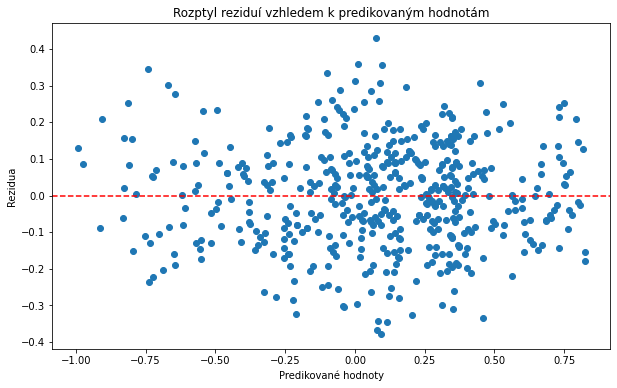

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.title('Rozptyl reziduí vzhledem k predikovaným hodnotám')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Lze pozorovat, že rozptyl reziduí je zhruba rovnoměrný kolem osy x, takže i druhý předpoklad lineární regrese můžeme nyní považovat za splněný. Tento model tedy bude náš finální dán rovnicí $Ping = \beta_0 \cdot Android + \beta_1 \cdot MacOS + \beta_2 \cdot Windows + \beta_3 \cdot ActiveUsers + \beta_4 \cdot InteractingPct + \beta_5 \cdot Android \cdot ActiveUsers + \beta_6 \cdot MacOS \cdot ActiveUsers + \beta_7 \cdot ActiveUsers \cdot InteractingPct + \beta_8 \cdot ActiveUsers^2$.

## 2) Identifikace parametrů s nejproblematičtější hodnotou odezvy
Jako parametry považuji vstupní hodnoty modelu (ve strojovém učení se pojem parametr, např. počet vrstev modelu, aktivační funkce, optimalizátor, ..., používá spíše ve smyslu koeficient zde u regrese, najít ale problematické koeficienty by bylo triviální).

Pro najití problematických parametrů použijeme nějakou nereálnou hodnotu ping, to jsou zajisté všechny záporné hodnoty. Tzn., že nám stačí vyřešit nerovnici $0 > \beta_0 \cdot Android + \beta_1 \cdot MacOS + \beta_2 \cdot Windows + \beta_3 \cdot ActiveUsers + \beta_4 \cdot InteractingPct + \beta_5 \cdot Android \cdot ActiveUsers + \beta_6 \cdot MacOS \cdot ActiveUsers + \beta_7 \cdot ActiveUsers \cdot InteractingPct + \beta_8 \cdot ActiveUsers^2$, kde za $beta_i$ dosadíme odhadnuté koeficienty z dat.

In [188]:
betas = results.params.values
values = np.ones_like(betas).T
betas @ values